<a href="https://colab.research.google.com/github/conniemahy/Test/blob/main/Ex_Files_Machine_Learning_with_Python_Decision_Trees/Ex_Files_Machine_Learning_with_Python_Decision_Trees/Exercise%20Files/02/02e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree

## 1. Collect the Data

In [3]:
import pandas as pd
DEM = pd.read_csv("CM.DEM Label_20240610_20240616.csv")
SWD = pd.read_csv("SWD Data_20240610_20240616.csv")


In [29]:
DEM_dropped = DEM[((DEM.Date != '20240610'))]

In [108]:
DEM_dropped = DEM[['ID', 'Date', 'Sex','Age', 'Age_Group', 'Marital_Status','Occupation', 'Education','MHI_G', 'OCC','Floor_Area_G' ]]

In [109]:
DEM_dropped.head()

,ID,Date,Sex,Age,Age_Group,Marital_Status,Occupation,Education,MHI_G,OCC,Floor_Area_G
0,10001,20240610,Male,56,55-59 Yrs Old,Married,Service Workers and Shop Sales Workers,Tertiary-Degree or above/IVE Degree,Below HK$20000,Non Top 3 OCC,Prvate_700 Sq.Feet+
1,10002,20240610,Female,57,55-59 Yrs Old,Married,Housewife,Tertiary-Degree or above/IVE Degree,Below HK$20000,Non-working,Prvate_700 Sq.Feet+
2,10401,20240610,Male,33,30-34 Yrs Old,Single,Elementary Occupations,Upper Secondary School/Yijin,HK$20000-HK$39999,Non Top 3 OCC,Public
3,10402,20240610,Female,61,60-64 Yrs Old,Separated/Divorced/Widow,Elementary Occupations,Primary or below,HK$20000-HK$39999,Non Top 3 OCC,Public
4,10403,20240610,Male,32,30-34 Yrs Old,Single,Craft and Related Workers,Upper Secondary School/Yijin,HK$20000-HK$39999,Non Top 3 OCC,Public


In [110]:
SWD_dropped = SWD[((SWD.date != '20240610'))]

In [111]:
SWD_dropped = SWD[['date', 'ID','channel', 'duration']]

In [112]:
SWD_dropped.head()

,date,ID,channel,duration
0,20240610,10001,20131,1
1,20240610,10001,20901,49
2,20240610,10001,20901,12
3,20240610,10001,20901,82
4,20240610,10001,20901,4


In [113]:
def sumUniques(x):
    return x.drop_duplicates['duration'].sum()

dur = SWD_dropped.groupby(['ID']).agg({
    'duration': 'sum',
})

print(dur)

         duration
ID               
10001         989
10002         784
10098         989
10401         418
10402         555
...           ...
1086003      2797
1086098      4863
1086101      5290
1086102      3243
1086198      5342

[3347 rows x 1 columns]


In [114]:
merged_df = DEM_dropped.merge(dur, on='ID')

In [115]:
merged_df. head()

,ID,Date,Sex,Age,Age_Group,Marital_Status,Occupation,Education,MHI_G,OCC,Floor_Area_G,duration
0,10001,20240610,Male,56,55-59 Yrs Old,Married,Service Workers and Shop Sales Workers,Tertiary-Degree or above/IVE Degree,Below HK$20000,Non Top 3 OCC,Prvate_700 Sq.Feet+,989
1,10001,20240611,Male,56,55-59 Yrs Old,Married,Service Workers and Shop Sales Workers,Tertiary-Degree or above/IVE Degree,Below HK$20000,Non Top 3 OCC,Prvate_700 Sq.Feet+,989
2,10001,20240612,Male,56,55-59 Yrs Old,Married,Service Workers and Shop Sales Workers,Tertiary-Degree or above/IVE Degree,Below HK$20000,Non Top 3 OCC,Prvate_700 Sq.Feet+,989
3,10002,20240610,Female,57,55-59 Yrs Old,Married,Housewife,Tertiary-Degree or above/IVE Degree,Below HK$20000,Non-working,Prvate_700 Sq.Feet+,784
4,10002,20240611,Female,57,55-59 Yrs Old,Married,Housewife,Tertiary-Degree or above/IVE Degree,Below HK$20000,Non-working,Prvate_700 Sq.Feet+,784


In [116]:
merged_df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15531 entries, 0 to 15530
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              15531 non-null  int64 
 1   Date            15531 non-null  int64 
 2   Sex             15531 non-null  object
 3   Age             15531 non-null  int64 
 4   Age_Group       15531 non-null  object
 5   Marital_Status  15531 non-null  object
 6   Occupation      15531 non-null  object
 7   Education       15531 non-null  object
 8   MHI_G           14143 non-null  object
 9   OCC             15531 non-null  object
 10  Floor_Area_G    15531 non-null  object
 11  duration        15531 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.4+ MB


In [117]:
merged_df.describe()

,ID,Date,Age,duration
count,1.553100e+04,1.553100e+04,15531.000000,15531.000000
mean,7.349958e+05,2.024061e+07,47.441118,1393.025755
std,3.011928e+05,1.999384e+00,20.323043,1351.635508
min,1.000100e+04,2.024061e+07,4.000000,1.000000
25%,5.618010e+05,2.024061e+07,34.000000,370.500000
50%,7.812020e+05,2.024061e+07,49.000000,959.000000
75%,1.028101e+06,2.024062e+07,64.000000,2015.000000
max,1.086102e+06,2.024062e+07,98.000000,9734.000000


## 2. Explore the Data

In [118]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [128]:
median_duration_by_status = merged_df.groupby("Marital_Status")["duration"].median().sort_values(ascending=False).index

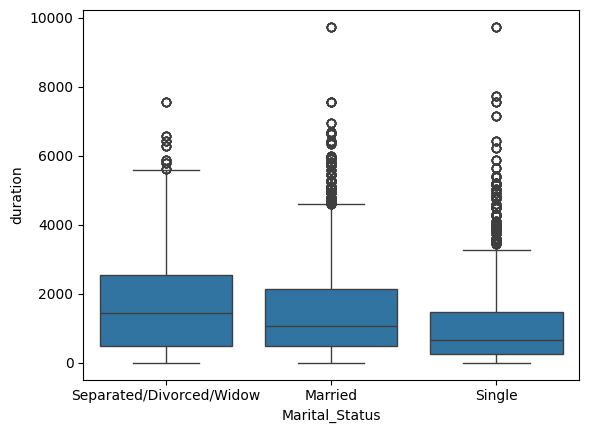

In [133]:
ax = sns.boxplot(data = merged_df, x = 'Marital_Status', y = 'duration', order=median_duration_by_status)

In [134]:
median_duration_by_status = merged_df.groupby("Age_Group")["duration"].median().sort_values(ascending=False).index

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '65+ Yrs Old'),
  Text(1, 0, '60-64 Yrs Old'),
  Text(2, 0, '55-59 Yrs Old'),
  Text(3, 0, '50-54 Yrs Old'),
  Text(4, 0, '45-49 Yrs Old'),
  Text(5, 0, '40-44 Yrs Old'),
  Text(6, 0, '35-39 Yrs Old'),
  Text(7, 0, '30-34 Yrs Old'),
  Text(8, 0, '25-29 Yrs Old'),
  Text(9, 0, '10-14 Yrs Old'),
  Text(10, 0, '4-9 Yrs Old'),
  Text(11, 0, '15-19 Yrs Old'),
  Text(12, 0, '20-24 Yrs Old')])

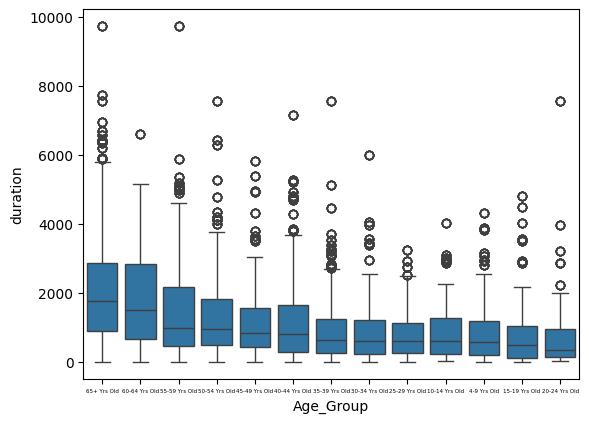

In [141]:
ax = sns.boxplot(data = merged_df, x = 'Age_Group', y = 'duration', order=median_duration_by_status)
plt.xticks(fontsize=4)

In [142]:
median_duration_by_status = merged_df.groupby("Occupation")["duration"].median().sort_values(ascending=False).index

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Retired'),
  Text(1, 0, 'Other working'),
  Text(2, 0, 'Housewife'),
  Text(3, 0, 'Plant and Machine Operators and Assemblers'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Elementary Occupations'),
  Text(6, 0, 'Clerks'),
  Text(7, 0, 'Service Workers and Shop Sales Workers'),
  Text(8, 0, 'Craft and Related Workers'),
  Text(9, 0, 'Professionals'),
  Text(10, 0, 'Associated Professionals'),
  Text(11, 0, 'Managers and Administrators'),
  Text(12, 0, 'Student'),
  Text(13, 0, 'Children Before Educational Age')])

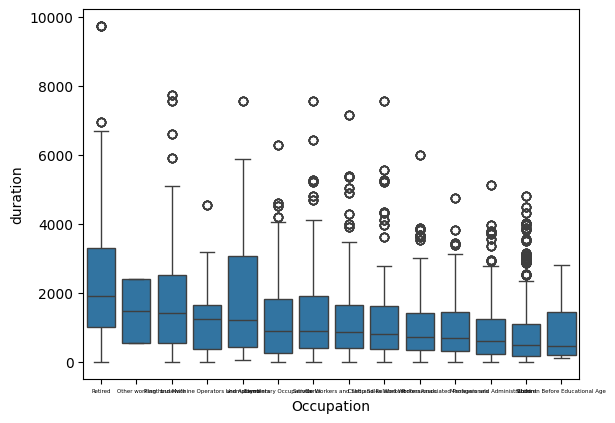

In [143]:
ax = sns.boxplot(data = merged_df, x = 'Occupation', y = 'duration', order=median_duration_by_status)
plt.xticks(fontsize=4)

In [146]:
median_duration_by_status = merged_df.groupby("Education")["duration"].median().sort_values(ascending=False).index

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Lower Secondary School/YPTP'),
  Text(1, 0, 'Primary or below'),
  Text(2, 0, 'Upper Secondary School/Yijin'),
  Text(3, 0, 'Matriculate'),
  Text(4, 0, 'Tertiary-Non Degree/Associate Degree/IVE Diploma'),
  Text(5, 0, 'Tertiary-Degree or above/IVE Degree')])

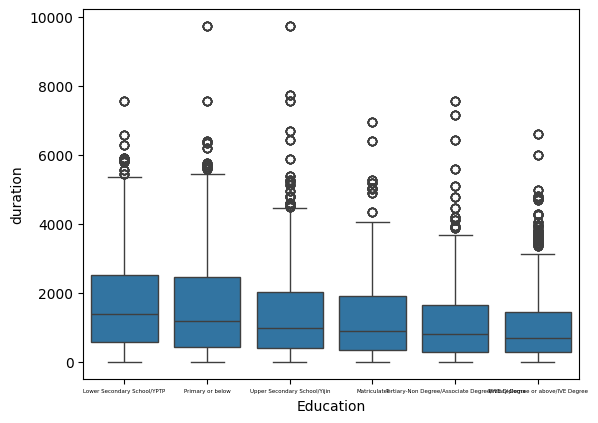

In [147]:
ax = sns.boxplot(data = merged_df, x = 'Education', y = 'duration', order=median_duration_by_status)
plt.xticks(fontsize=4)

In [148]:
median_duration_by_status = merged_df.groupby("MHI_G")["duration"].median().sort_values(ascending=False).index

([0, 1, 2, 3],
 [Text(0, 0, 'Below HK$20000'),
  Text(1, 0, 'HK$40000-HK$59999'),
  Text(2, 0, 'HK$20000-HK$39999'),
  Text(3, 0, 'HK$60000+')])

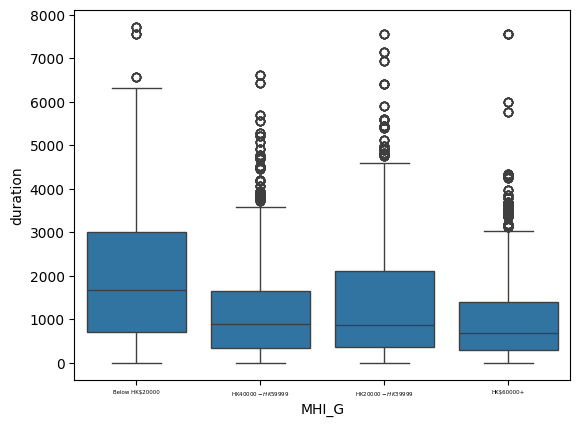

In [150]:
ax = sns.boxplot(data = merged_df, x = 'MHI_G', y = 'duration', order=median_duration_by_status)
plt.xticks(fontsize=4)

In [151]:
median_duration_by_status = merged_df.groupby("OCC")["duration"].median().sort_values(ascending=False).index

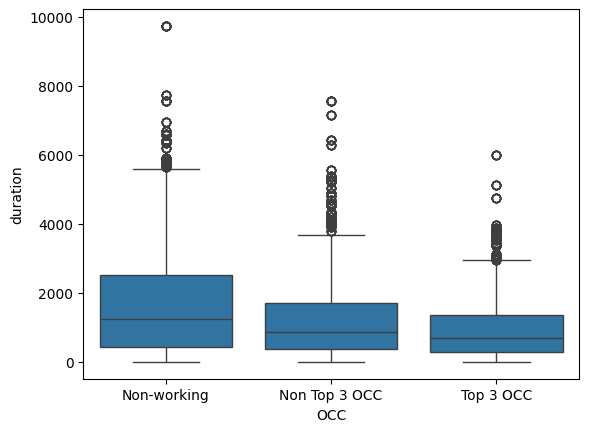

In [152]:
ax = sns.boxplot(data = merged_df, x = 'OCC', y = 'duration', order=median_duration_by_status)

In [153]:
median_duration_by_status = merged_df.groupby("Floor_Area_G")["duration"].median().sort_values(ascending=False).index

([0, 1, 2, 3],
 [Text(0, 0, 'Public'),
  Text(1, 0, 'Prvate_Less than 400 Sq.Feet'),
  Text(2, 0, 'Prvate_400-699 Sq.Feet'),
  Text(3, 0, 'Prvate_700 Sq.Feet+')])

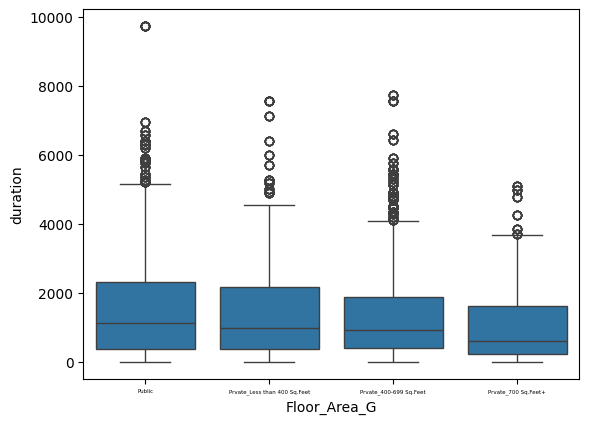

In [155]:
ax = sns.boxplot(data = merged_df, x = 'Floor_Area_G', y = 'duration', order=median_duration_by_status)
plt.xticks(fontsize=4)

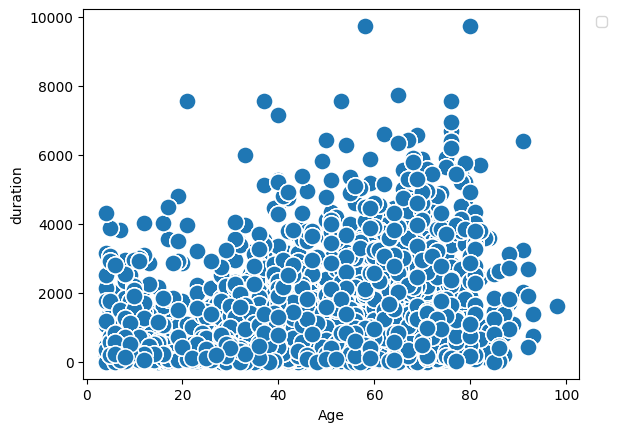

In [156]:
ax = sns.scatterplot(data = merged_df,
                     x = 'Age',
                     y = 'duration',
                     markers = ['^','o'],
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')